<a href="https://colab.research.google.com/github/MaheswarBabu/Optimization-Model/blob/main/Optimization_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 98.2 MB/s eta 0:00:00


Optimization Status: Optimal
Units of Product A to produce: 0.0
Units of Product B to produce: 60.0
Maximum Profit: ₹1800.0


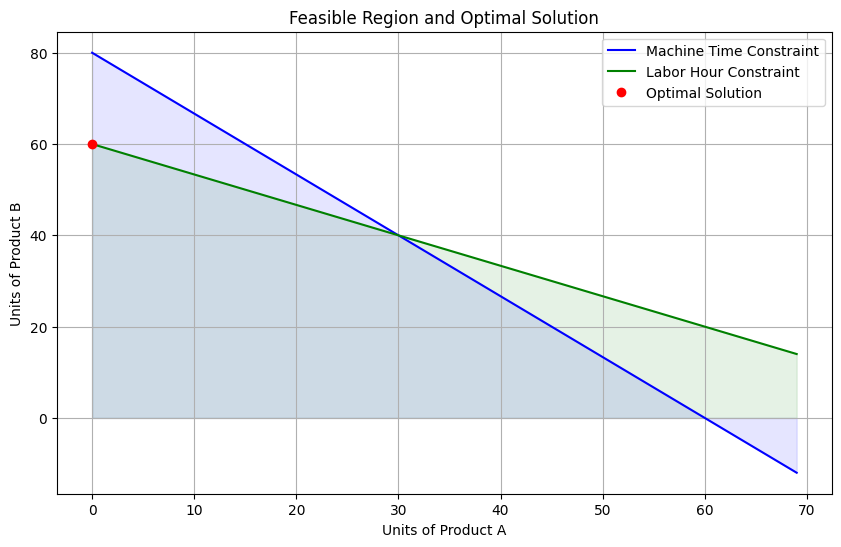


Business Insight:
The factory should produce 0.0 units of Product A and 60.0 units of Product B to achieve the maximum profit of ₹1800.0.
When Product A profit = ₹15:
Product A: 0.0 units
Product B: 60.0 units
Total Profit: ₹1800.0

When Product A profit = ₹20:
Product A: 0.0 units
Product B: 60.0 units
Total Profit: ₹1800.0

When Product A profit = ₹25:
Product A: 30.0 units
Product B: 40.0 units
Total Profit: ₹1950.0

When Product A profit = ₹30:
Product A: 30.0 units
Product B: 40.0 units
Total Profit: ₹2100.0



In [4]:
#Importing libraries
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, value
import matplotlib.pyplot as plt

#Creating LP maximization problem
model = LpProblem("Maximize_Profit", LpMaximize)

#Defining decision variables (number of units to produce)
x = LpVariable("Product_A", lowBound=0, cat="Integer")
y = LpVariable("Product_B", lowBound=0, cat="Integer")

#Defining the objective function (maximize total profit)
model += 20 * x + 30 * y, "Total Profit"

#Adding constraints (machine time and labor hours)
model += 4 * x + 3 * y <= 240, "Machine Time"
model += 2 * x + 3 * y <= 180, "Labor Hours"

#Solving the optimization problem
model.solve()

#Displaying the results
print("Optimization Status:", LpStatus[model.status])
print(f"Units of Product A to produce: {x.varValue}")
print(f"Units of Product B to produce: {y.varValue}")
print(f"Maximum Profit: ₹{value(model.objective)}")

#Preparing constraint lines for plotting feasible region
A_range = range(0, 70)
machine_limit = [(240 - 4*a)/3 for a in A_range]
labor_limit = [(180 - 2*a)/3 for a in A_range]

#Plotting the feasible region and optimal solution
plt.figure(figsize=(10,6))
plt.plot(A_range, machine_limit, label='Machine Time Constraint', color='blue')
plt.plot(A_range, labor_limit, label='Labor Hour Constraint', color='green')
plt.fill_between(A_range, 0, machine_limit, color='blue', alpha=0.1)
plt.fill_between(A_range, 0, labor_limit, color='green', alpha=0.1)
plt.plot(x.varValue, y.varValue, 'ro', label='Optimal Solution')
plt.xlabel("Units of Product A")
plt.ylabel("Units of Product B")
plt.title("Feasible Region and Optimal Solution")
plt.grid(True)
plt.legend()
plt.show()

#Printing final business insight
print("\nBusiness Insight:")
print(f"The factory should produce {x.varValue} units of Product A and {y.varValue} units of Product B to achieve the maximum profit of ₹{value(model.objective)}.")

for new_profit_a in [15, 20, 25, 30]:
    temp_model = LpProblem("Sensitivity_Profit_A", LpMaximize)
    temp_model += new_profit_a * x + 30 * y
    temp_model += 4 * x + 3 * y <= 240
    temp_model += 2 * x + 3 * y <= 180
    temp_model.solve()

    print(f"When Product A profit = ₹{new_profit_a}:")
    print(f"Product A: {x.varValue} units")
    print(f"Product B: {y.varValue} units")
    print(f"Total Profit: ₹{value(temp_model.objective)}\n")


